<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/11_NLP_Detect_Spam_Emails_Using_Navie_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1 . Load data

In [2]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

Cloning into 'DS102.K21'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 429 (delta 56), reused 0 (delta 0), pack-reused 305
Receiving objects: 100% (429/429), 7.45 MiB | 5.62 MiB/s, done.
Resolving deltas: 100% (231/231), done.


In [0]:
data = pd.read_csv('DS102.K21/emails.csv')

In [4]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [0]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values

# 2 . Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# 2 . Preprocessing data

In [0]:
vectorizer = CountVectorizer()

In [0]:
X_train = vectorizer.fit_transform(X_train).toarray()

In [0]:
#export tap tu vung
trainVocab = vectorizer.vocabulary_

In [0]:
vectorizer = CountVectorizer(vocabulary = trainVocab)
X_test = vectorizer.fit_transform(X_test).toarray()

# 4 . Train model

In [0]:
model = MultinomialNB()

In [14]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# 5 . Evaluate model

Train data

In [15]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3475
           1       0.98      1.00      0.99      1107

    accuracy                           1.00      4582
   macro avg       0.99      1.00      0.99      4582
weighted avg       1.00      1.00      1.00      4582



Confusion matrix in train data: 
 [[3455   20]
 [   1 1106]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

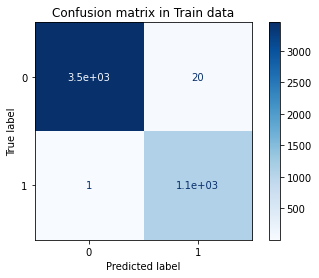

In [16]:
print('Confusion matrix in train data: \n', confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = 'Blues')
plt.title('Confusion matrix in Train data')

Test data

In [17]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.97      0.98      0.97       261

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



Confusion matrix in Test data: 
 [[876   9]
 [  6 255]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

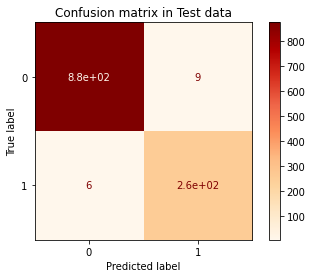

In [18]:
print('Confusion matrix in Test data: \n', confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(model, X_test, y_test, cmap = 'OrRd')
plt.title('Confusion matrix in Test data')